/var/folders/w0/f40yh3451y57_mt9g9mx5jmh0000gn/T/ipykernel_63172/1816916715.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


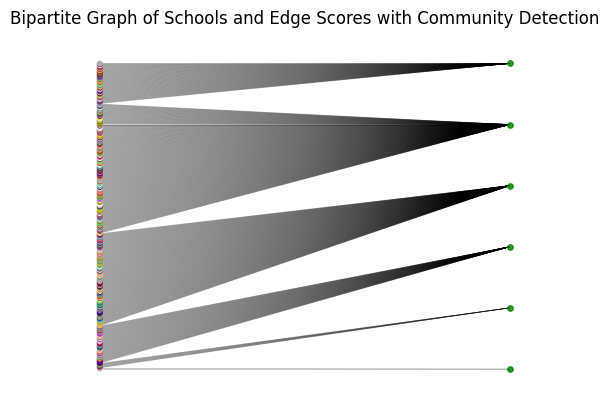

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Read CSV file
file_path = 'Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240416.csv'
df = pd.read_csv(file_path)

# Extract unique school names
schools = df['Name of School'].unique().tolist()

# Extract unique zip codes
zip_codes = df['ZIP Code'].unique().tolist()

# Create a bipartite graph
B = nx.Graph()

# Add school nodes and group them into communities based on zip codes
zip_code_communities = defaultdict(list)
for school, zip_code in zip(df['Name of School'], df['ZIP Code']):
    B.add_node(school, bipartite='school', zip_code=zip_code)
    zip_code_communities[zip_code].append(school)

communities = list(zip_code_communities.values())

# Create a mapping of school to community
school_community_mapping = {}
for idx, community in enumerate(communities):
    for school in community:
        school_community_mapping[school] = idx

# Create a dictionary mapping zip codes to colors
zip_code_colors = {
    60605: 'red',
    60607: 'blue',
    60608: 'green',
    60609: 'orange',
    60610: 'yellow',
    60612: 'purple',
    60613: 'cyan',
    60614: 'magenta',
    60615: 'lime',
    60616: 'pink',
    60617: 'teal',
    60618: 'olive',
    60619: 'brown',
    60620: 'navy',
    60621: 'maroon',
    60622: 'gold',
    60623: 'silver',
    60624: 'crimson',
    60625: 'indigo',
    60626: 'turquoise',
    60627: 'violet',
    60628: 'azure',
    60629: 'lavender',
    60630: 'orchid',
    60631: 'coral',
    60632: 'salmon',
    60633: 'skyblue',
    60634: 'khaki',
    60636: 'tan',
    60637: 'ivory',
    60638: 'plum',
    60639: 'beige',
    60640: 'chartreuse',
    60641: 'thistle',
    60642: 'peru',
    60643: 'darkcyan',
    60644: 'deeppink',
    60645: 'firebrick',
    60646: 'dodgerblue',
    60647: 'darkorange',
    60649: 'darkslategray',
    60651: 'darkseagreen',
    60652: 'darkviolet',
    60653: 'crimson',
    60655: 'cyan',
    60656: 'darkkhaki',
    60657: 'darkolivegreen',
    60659: 'darkslateblue',
    60660: 'darkorchid',
    60707: 'darkturquoise',
    60827: 'darkred'
}

# Assign community colors based on zip codes
community_colors = [zip_code_colors.get(B.nodes[community[0]]['zip_code'], 'turquoise') for community in communities]

# Add 'Edge Score' nodes and edges to the bipartite graph
df['Edge Score'] = pd.to_numeric(df['Edge Score'], errors='coerce')
school_edge_scores = df.set_index('Name of School')['Edge Score'].to_dict()
for school, edge_score in school_edge_scores.items():
    if not pd.isna(edge_score):
        B.add_node(edge_score, bipartite='edge_score')
        B.add_edge(school, edge_score, weight=edge_score)

# Draw nodes with colors based on communities
node_colors = [community_colors[school_community_mapping[school]] for school in schools]

# Draw the bipartite graph with custom layout for school nodes
pos = {}
school_y_positions = np.linspace(0, 1, len(schools))
pos.update((node, (0, y)) for node, y in zip(schools, school_y_positions))

# Place edge score nodes on the right side with normal spacing
edge_score_nodes = [node for node, data in B.nodes(data=True) if data['bipartite'] == 'edge_score']
edge_score_y_positions = np.linspace(0, 1, len(edge_score_nodes))
pos.update((node, (1, y)) for node, y in zip(edge_score_nodes, edge_score_y_positions))

# Draw nodes
nx.draw_networkx_nodes(B, pos, nodelist=schools, node_color=node_colors, node_size=10, alpha=0.8)
nx.draw_networkx_nodes(B, pos, nodelist=edge_score_nodes, node_color='green', node_size=15, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(B, pos, width=0.5, alpha=0.3, edge_color='black')

# Set plot title and display the graph
plt.title('Bipartite Graph of Schools and Edge Scores with Community Detection')
plt.axis('off')
plt.show()

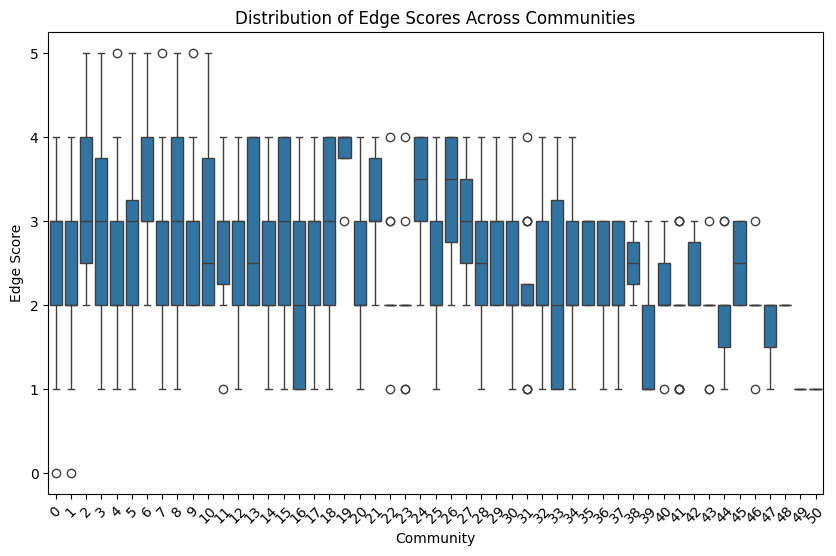

In [3]:
import seaborn as sns

# Create a DataFrame to store edge scores and their corresponding community
edge_score_data = []
for school, edge_score in school_edge_scores.items():
    if not pd.isna(edge_score):
        community = school_community_mapping[school]
        edge_score_data.append({'School': school, 'Edge Score': edge_score, 'Community': community})

edge_score_df = pd.DataFrame(edge_score_data)

# Plot boxplot of edge scores for each community
plt.figure(figsize=(10, 6))
sns.boxplot(x='Community', y='Edge Score', data=edge_score_df)
plt.title('Distribution of Edge Scores Across Communities')
plt.xlabel('Community')
plt.ylabel('Edge Score')
plt.xticks(rotation=45)
plt.show()


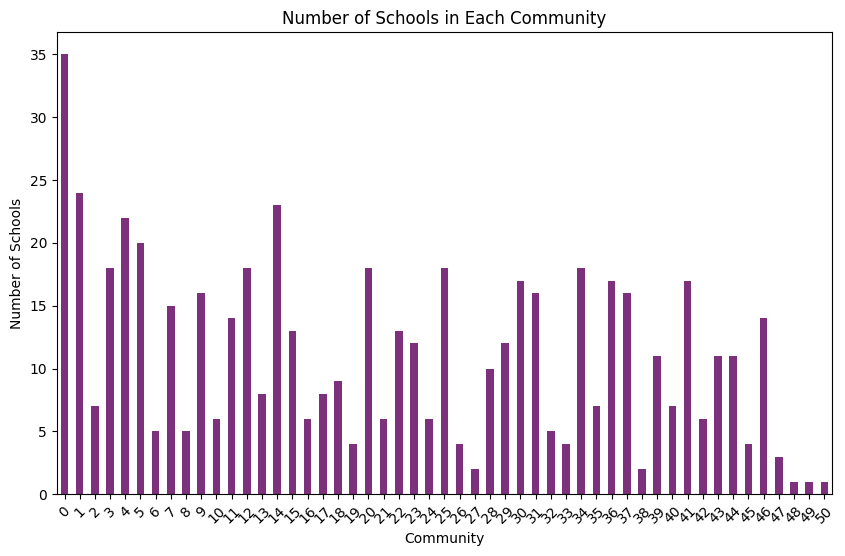

In [4]:
# Count the number of schools in each community
school_count_per_community = edge_score_df['Community'].value_counts().sort_index()

# Plot bar chart of school count per community
plt.figure(figsize=(10, 6))
color_dark_lavender = (125/255, 49/255, 125/255)  # RGB values (R, G, B) scaled to [0, 1]
school_count_per_community.plot(kind='bar', color=color_dark_lavender)
plt.title('Number of Schools in Each Community')
plt.xlabel('Community')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.show()


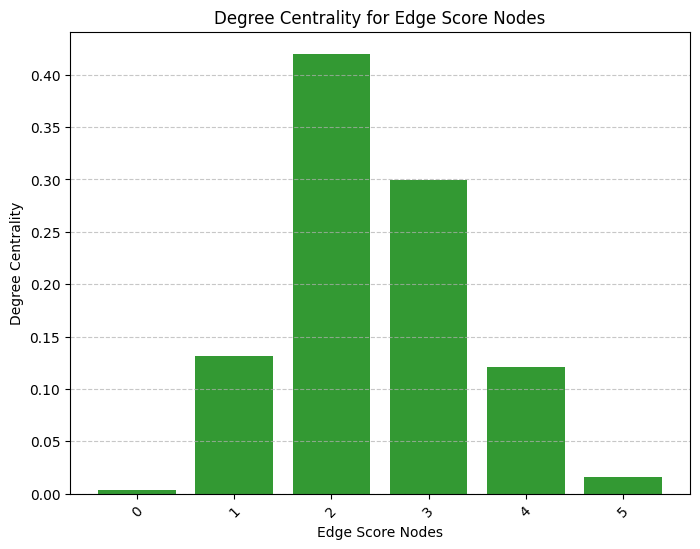

In [5]:
# Calculate degree centrality for edge score nodes
degree_centrality = nx.degree_centrality(B)

# Extract degree centrality values for edge score nodes
edge_score_degree_centrality = {node: degree_centrality[node] for node in edge_score_nodes}

# Plot degree centrality
plt.figure(figsize=(8, 6))
plt.bar(edge_score_degree_centrality.keys(), edge_score_degree_centrality.values(), color='green', alpha=0.8)
plt.title('Degree Centrality for Edge Score Nodes')
plt.xlabel('Edge Score Nodes')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


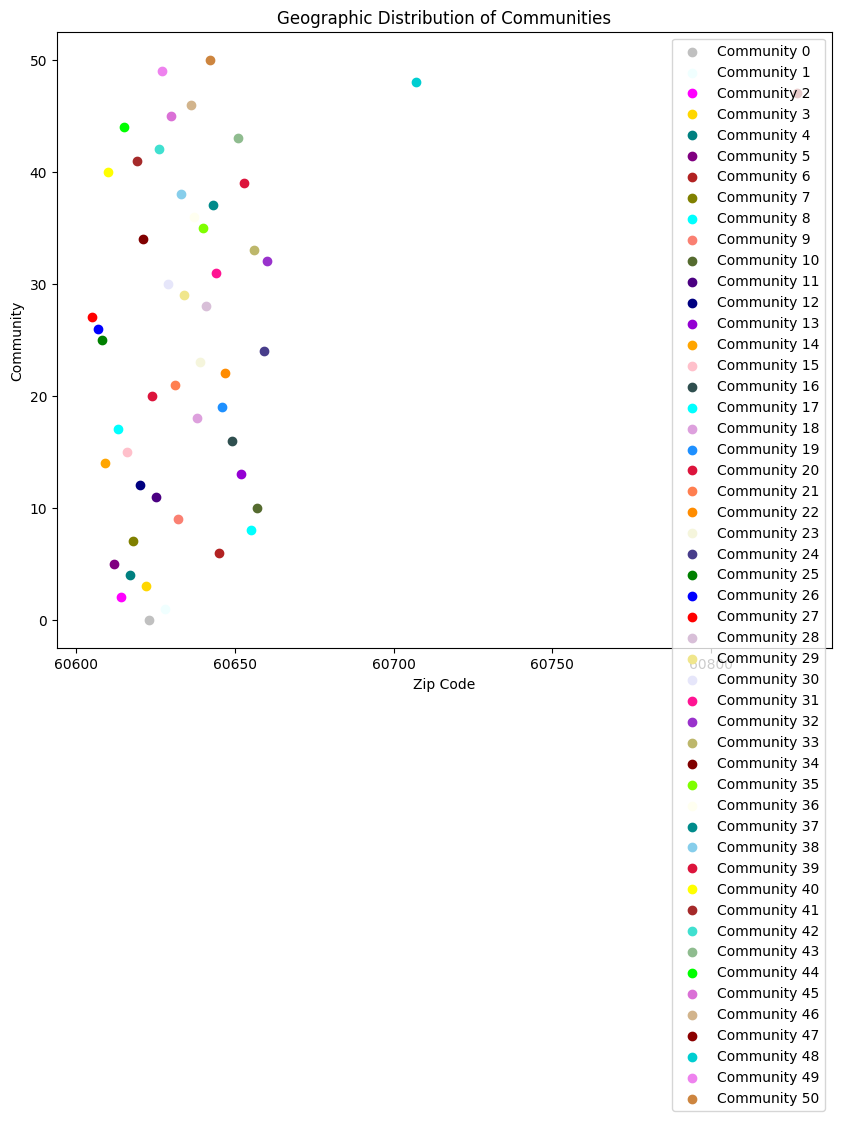

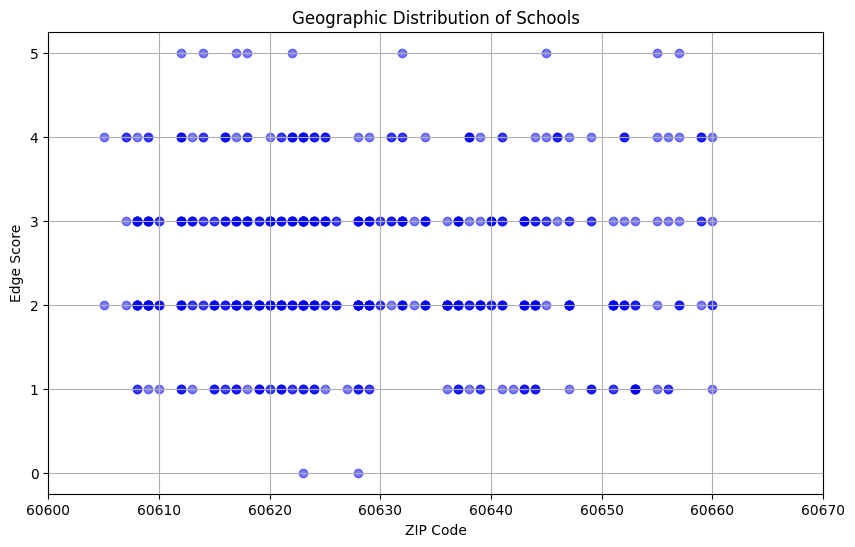

In [6]:
# Plot communities on a map using zip code centroids
plt.figure(figsize=(10, 8))
for idx, community in enumerate(communities):
    zip_code = B.nodes[community[0]]['zip_code']
    color = zip_code_colors.get(zip_code, 'turquoise')
    plt.scatter(zip_code, idx, color=color, label=f'Community {idx}')
plt.title('Geographic Distribution of Communities')
plt.xlabel('Zip Code')
plt.ylabel('Community')
plt.legend()
plt.show()

# Extract zip codes and edge scores
zip_codes = df['ZIP Code'].tolist()
edge_scores = pd.to_numeric(df['Edge Score'], errors='coerce').dropna()

# Plot the geographic distribution with specified x-axis range
plt.figure(figsize=(10, 6))
plt.scatter(zip_codes, edge_scores, color='blue', alpha=0.5)
plt.title('Geographic Distribution of Schools')
plt.xlabel('ZIP Code')
plt.ylabel('Edge Score')
plt.xlim(60600, 60670)  # Set x-axis range
plt.grid(True)
plt.show()
